In [220]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

En este proyecto se trataran los datos atípicos y los datos nulos generados en base al proceso de atípicos.

In [221]:

dd= pd.read_excel('Gastos y costos 20-23.xlsx', sheet_name="2021") 

Corroboramos las variables numéricas y sus outliers, al mismo tiempo las extraemos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        3035 non-null   datetime64[ns]
 1   FOLIO        2888 non-null   object        
 2   UUID         3035 non-null   object        
 3   RFC          3035 non-null   object        
 4   PROVEEDOR    3035 non-null   object        
 5   TIPO GASTO   3035 non-null   object        
 6   DESCRIPCION  3035 non-null   object        
 7   MP           2381 non-null   object        
 8   TC           3035 non-null   float64       
 9   IMPORTE      3035 non-null   float64       
 10  IVA          3035 non-null   float64       
 11  RET ISR      3035 non-null   float64       
 12  RET IVA      3035 non-null   float64       
 13  TOTAL MX     3035 non-null   float64       
 14  TOTAL SAT    3035 non-null   float64       
 15  TIPO         3035 non-null   object        
 16  STATUS

<Axes: >

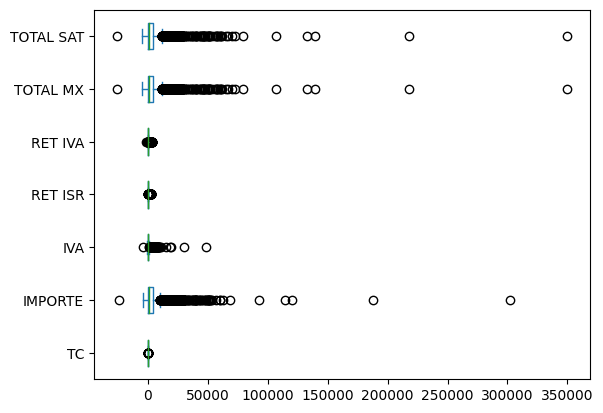

In [222]:
dd.info()
dd.plot(kind='box', vert=False)

In [223]:
dd2=dd[["TC","IMPORTE", "IVA","RET ISR","RET IVA","TOTAL MX","TOTAL SAT"]]
dd2

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,490.00,78.40,0.0,0.0,568.40,568.40
1,1.0,345.00,55.20,0.0,0.0,400.20,400.20
2,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.00
3,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
4,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
...,...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3031,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3032,1.0,22826.46,705.58,0.0,0.0,23532.04,23532.04
3033,1.0,0.00,0.00,0.0,0.0,0.00,0.00


Se utilizará el métpdp de las cercas de Tukey para identificar los datos atípicos.

In [224]:
y=dd2
LimiteS= y.mean() + 3*y.std()
LimiteI= y.mean() - 3*y.std()
print("Limite superior permitido", LimiteS)
print("Limite inferior permitido", LimiteI)

Limite superior permitido TC               6.286851
IMPORTE      36154.569820
IVA           5464.876801
RET ISR        900.150092
RET IVA       1200.884906
TOTAL MX     40680.462408
TOTAL SAT    40671.985064
dtype: float64
Limite inferior permitido TC              -3.981398
IMPORTE     -27625.812771
IVA          -4276.811367
RET ISR       -833.428945
RET IVA      -1053.848939
TOTAL MX    -31176.694132
TOTAL SAT   -31129.503410
dtype: float64


In [225]:
Outli= dd2[(y>LimiteS)|(y<LimiteI)]
Outli

dd3= dd2[(y<=LimiteS)&(y>=LimiteI)]
dd3

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,490.00,78.40,0.0,0.0,568.40,568.40
1,1.0,345.00,55.20,0.0,0.0,400.20,400.20
2,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.00
3,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
4,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
...,...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3031,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3032,1.0,22826.46,705.58,0.0,0.0,23532.04,23532.04
3033,1.0,0.00,0.00,0.0,0.0,0.00,0.00


Se identifican los datos nulos obtenidos del proceso anteior. 

In [226]:
valores_nulos=dd3.isnull().sum()
valores_nulos

TC           24
IMPORTE      43
IVA          38
RET ISR      32
RET IVA      81
TOTAL MX     40
TOTAL SAT    40
dtype: int64

La primer variable se trata con media debido a su alto contenido de un solo número, en este caso el 1.

In [227]:
data_clean=dd3.copy()
data_clean["TC"]=data_clean["TC"].fillna(data_clean["TC"].mean())
data_clean

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,490.00,78.40,0.0,0.0,568.40,568.40
1,1.0,345.00,55.20,0.0,0.0,400.20,400.20
2,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.00
3,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
4,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
...,...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3031,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3032,1.0,22826.46,705.58,0.0,0.0,23532.04,23532.04
3033,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [228]:
valores_nulos=data_clean.isnull().sum()
valores_nulos

TC            0
IMPORTE      43
IVA          38
RET ISR      32
RET IVA      81
TOTAL MX     40
TOTAL SAT    40
dtype: int64

En la siguiente variable, se trabajo con mediana, ya que el número medio del importe puede no hacer más los outliers ya eliminados.

In [231]:
data_clean["IMPORTE"]=data_clean["IMPORTE"].fillna(data_clean["IMPORTE"].median())
data_clean

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,490.00,78.40,0.0,0.0,568.40,568.40
1,1.0,345.00,55.20,0.0,0.0,400.20,400.20
2,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.00
3,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
4,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
...,...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3031,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3032,1.0,22826.46,705.58,0.0,0.0,23532.04,23532.04
3033,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [234]:
valores_nulos=data_clean.isnull().sum()
valores_nulos

TC            0
IMPORTE       0
IVA           0
RET ISR      32
RET IVA      81
TOTAL MX     40
TOTAL SAT    40
dtype: int64

El segundo valor se trata con media debido al tipo de indicador con el que se está tratando, en este caso podemos obtener información valiosa tratando IVA con un comportamiento promedio.

In [233]:
data_clean["IVA"]=data_clean["IVA"].fillna(data_clean["IMPORTE"]*.16)
data_clean

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,490.00,78.40,0.0,0.0,568.40,568.40
1,1.0,345.00,55.20,0.0,0.0,400.20,400.20
2,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.00
3,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
4,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
...,...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3031,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3032,1.0,22826.46,705.58,0.0,0.0,23532.04,23532.04
3033,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [235]:
valores_nulos=data_clean.isnull().sum()
valores_nulos

TC            0
IMPORTE       0
IVA           0
RET ISR      32
RET IVA      81
TOTAL MX     40
TOTAL SAT    40
dtype: int64

Se utiliza eliminar dos columnas, RET ISR y RET IVA, ya que cuentan con la mayor parte de los datos como nulos. Basado en la función by group().

In [236]:
mm=dd.groupby(["RET ISR"])["RET ISR"].count()
mm2=dd.groupby(["RET IVA"])["RET IVA"].count()
print(mm)
print(mm2)

RET ISR
0.00       2979
157.34        1
500.00       11
666.00       12
1000.00       2
1600.00       1
2600.00       5
2800.00       5
3000.00      19
Name: RET ISR, dtype: int64
RET IVA
-1424.27       1
-113.18        1
 0.00       2823
 3.14         10
 3.24          1
            ... 
 2773.35       1
 2843.50       1
 2986.68       5
 3200.00      19
 3626.36       1
Name: RET IVA, Length: 137, dtype: int64


In [237]:
data_clean=data_clean.drop(["RET ISR","RET IVA"], axis=1)


In [238]:
valores_nulos=data_clean.isnull().sum()
valores_nulos

TC            0
IMPORTE       0
IVA           0
TOTAL MX     40
TOTAL SAT    40
dtype: int64

Rellenamos total MX con la suma de los datos generales, al mismo tiempo TOTAL SAT representa la misma suma.

In [239]:
data_clean["TOTAL MX"]=data_clean["TOTAL MX"].fillna(data_clean["IMPORTE"]+data_clean["IVA"])
data_clean
data_clean["TOTAL SAT"]=data_clean["TOTAL SAT"].fillna(data_clean["TOTAL MX"])
data_clean

,TC,IMPORTE,IVA,TOTAL MX,TOTAL SAT
0,1.0,490.00,78.40,568.40,568.40
1,1.0,345.00,55.20,400.20,400.20
2,1.0,3447.41,551.59,3999.00,3999.00
3,1.0,5551.38,888.22,6439.60,6439.60
4,1.0,5551.98,888.32,6440.30,6440.30
...,...,...,...,...,...
3030,1.0,0.00,0.00,0.00,0.00
3031,1.0,0.00,0.00,0.00,0.00
3032,1.0,22826.46,705.58,23532.04,23532.04
3033,1.0,0.00,0.00,0.00,0.00


In [240]:
valores_nulos=data_clean.isnull().sum()
valores_nulos

TC           0
IMPORTE      0
IVA          0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

Uniremos la parte del dataframe que es tipo string con los numéricos

<Axes: >

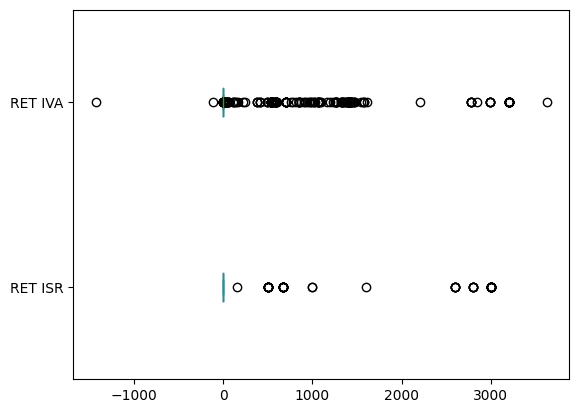

In [241]:
Datostop = pd.concat([dd, data_clean], axis=1)
Datostop.plot(kind='box', vert=False)

Comprobaremos los datos nulos en las otras variables.

In [ ]:
Valores=

Por último obtenemos los datos en un archivo de tipo csv y corroboraremos con una gráfica de caja la limpieza.

In [82]:
#Convertir DataFrame a CSV
Datostop.to_csv("2021.csv")

Aquí empieza el trabajo con la base de datos 2022

In [170]:
pp= pd.read_excel('Gastos y costos 20-23.xlsx', sheet_name="2022") 

Visualizamos las variables numéricas y las extraemos, al mismo tiempo analizamos los outliers con una gráfica.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        2577 non-null   datetime64[ns]
 1   Folio        2475 non-null   object        
 2   UUID         2577 non-null   object        
 3   RFC          2577 non-null   object        
 4   Proveedor    2577 non-null   object        
 5   TIPO GASTO   2577 non-null   object        
 6   Descripción  2577 non-null   object        
 7   MP           2024 non-null   object        
 8   TC           1941 non-null   float64       
 9   Importe      2577 non-null   float64       
 10  IVA          2577 non-null   float64       
 11  RET ISR      2577 non-null   float64       
 12  RET IVA      2577 non-null   float64       
 13  Otros        0 non-null      float64       
 14  TOTAL MX     2577 non-null   float64       
 15  TOTAL SAT    2577 non-null   float64       
 16  Tipo  

<Axes: >

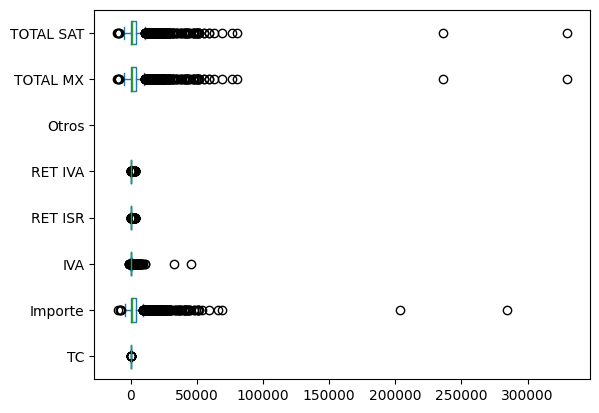

In [171]:
pp.info()
pp.plot(kind='box', vert=False)

In [172]:
pp2=pp[["TC","Importe", "IVA","RET ISR","RET IVA","TOTAL MX","TOTAL SAT"]]
pp2

,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
1,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
2,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3,1.0,0.00,0.00,0.0,0.0,0.00,0.00
4,1.0,0.00,0.00,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...
2572,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2573,1.0,17310.30,516.32,0.0,0.0,17826.62,17826.62
2574,NaN,0.00,0.00,0.0,0.0,0.00,0.00
2575,NaN,0.00,0.00,0.0,0.0,0.00,0.00


Basado en la prueba de conteo mediante group by, eliminamos dos columas, RET IVA Y RET ISR, ya que cuentan con la mayor parte de su estructura con datos nulos.

In [174]:
mm=pp2.groupby(["RET ISR"])["RET ISR"].count()
mm2=pp2.groupby(["RET IVA"])["RET IVA"].count()
print(mm)
print(mm2)

RET IVA
0.00       2507
3.43          3
3.48          1
3.67          1
3.79          1
6.25          1
6.40          1
9.14          2
11.67         1
13.23         1
15.06         1
19.34         1
22.24         1
23.35         1
167.83        4
533.34        7
570.63       11
1493.34       1
1706.67       1
2560.00       1
2773.34       7
2986.68       2
3200.00      18
3200.01       2
Name: RET IVA, dtype: int64


In [175]:
dc=pp2.drop(["RET ISR","RET IVA"], axis=1)


In [176]:
valores_nulos=dc.isnull().sum()
valores_nulos

TC           636
Importe        0
IVA            0
TOTAL MX       0
TOTAL SAT      0
dtype: int64

Después de seleccionar las variables numéricas y ponerlas en un dataframe, procederemos a cuantificar los datos outliers para procesarlos.

In [177]:
y=dc

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

LimiteS1_iqr= percentile75 + 1.5*iqr
LimiteI1_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", LimiteS1_iqr)
print("Limite inferior permitido", LimiteI1_iqr)

Limite superior permitido TC               1.000
Importe       9058.900
IVA           1031.150
TOTAL MX     10374.700
TOTAL SAT    10485.475
dtype: float64
Limite inferior permitido TC              1.000
Importe     -5435.340
IVA          -618.690
TOTAL MX    -6224.820
TOTAL SAT   -6291.285
dtype: float64


In [178]:
outlier= dc[(y>LimiteS1_iqr)|(y<LimiteI1_iqr)]
outlier

,TC,Importe,IVA,TOTAL MX,TOTAL SAT
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2572,NaN,NaN,NaN,NaN,NaN
2573,NaN,17310.3,NaN,17826.62,17826.62
2574,NaN,NaN,NaN,NaN,NaN
2575,NaN,NaN,NaN,NaN,NaN


In [179]:
dc1= dc[(y<=LimiteS1_iqr)&(y>=LimiteI1_iqr)]
dc1

,TC,Importe,IVA,TOTAL MX,TOTAL SAT
0,1.0,5551.38,888.22,6439.6,6439.6
1,1.0,5551.98,888.32,6440.3,6440.3
2,1.0,0.00,0.00,0.0,0.0
3,1.0,0.00,0.00,0.0,0.0
4,1.0,0.00,0.00,0.0,0.0
...,...,...,...,...,...
2572,1.0,0.00,0.00,0.0,0.0
2573,1.0,NaN,516.32,NaN,NaN
2574,NaN,0.00,0.00,0.0,0.0
2575,NaN,0.00,0.00,0.0,0.0


In [180]:
valores_nulos=dc1.isnull().sum()
valores_nulos


TC           654
Importe      305
IVA          303
TOTAL MX     291
TOTAL SAT    288
dtype: int64

Reemplazamos el valor del importe en NA, por la media del mismo, ya que ñpodemos notar un comportamiento en los importes agregados.

In [182]:
dc2=dc1.copy()
dc2["Importe"]=dc2["Importe"].fillna(dc2["Importe"].mean())

In [183]:
valores_nulos=dc2.isnull().sum()
valores_nulos

TC           654
Importe        0
IVA          303
TOTAL MX     291
TOTAL SAT    288
dtype: int64

Empezamos con la variable IVA, rellenamos los valores nulos con el 16% del valor del importe obtenido.

In [185]:

dc2['IVA'] = dc2['IVA'].fillna(dc2["Importe"] * 0.16)
dc2

,TC,Importe,IVA,TOTAL MX,TOTAL SAT
0,1.0,5551.380000,888.22,6439.6,6439.6
1,1.0,5551.980000,888.32,6440.3,6440.3
2,1.0,0.000000,0.00,0.0,0.0
3,1.0,0.000000,0.00,0.0,0.0
4,1.0,0.000000,0.00,0.0,0.0
...,...,...,...,...,...
2572,1.0,0.000000,0.00,0.0,0.0
2573,1.0,1449.186429,516.32,NaN,NaN
2574,NaN,0.000000,0.00,0.0,0.0
2575,NaN,0.000000,0.00,0.0,0.0


In [186]:
valores_nulos=dc2.isnull().sum()
valores_nulos

TC           654
Importe        0
IVA            0
TOTAL MX     291
TOTAL SAT    288
dtype: int64

Reemplazaremos la variable TC con la media, debido a que tiene un  número 1 repitiendose constantemente.

In [188]:
dc2["TC"]=dc2["TC"].fillna(dc2["TC"].mean())

In [189]:
valores_nulos=dc2.isnull().sum()
valores_nulos

TC             0
Importe        0
IVA            0
TOTAL MX     291
TOTAL SAT    288
dtype: int64

Para las variables total mx y total sat, realizaremos la suma de los valores del importe mas el Iva y encontraremos los datos faltantes.

In [191]:
dc2["TOTAL MX"]=dc2["TOTAL MX"].fillna(dc2["Importe"]+dc2["IVA"])
dc2
dc2["TOTAL SAT"]=dc2["TOTAL SAT"].fillna(dc2["TOTAL MX"])
dc2

,TC,Importe,IVA,TOTAL MX,TOTAL SAT
0,1.0,5551.380000,888.22,6439.600000,6439.600000
1,1.0,5551.980000,888.32,6440.300000,6440.300000
2,1.0,0.000000,0.00,0.000000,0.000000
3,1.0,0.000000,0.00,0.000000,0.000000
4,1.0,0.000000,0.00,0.000000,0.000000
...,...,...,...,...,...
2572,1.0,0.000000,0.00,0.000000,0.000000
2573,1.0,1449.186429,516.32,1965.506429,1965.506429
2574,1.0,0.000000,0.00,0.000000,0.000000
2575,1.0,0.000000,0.00,0.000000,0.000000


In [192]:
valores_nulos=dc2.isnull().sum()
valores_nulos

TC           0
Importe      0
IVA          0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

Posteriormente, uniremos las variables cuantitativas con las cualitativas, comprobaremos los outliers con un boxplot y convertiremos el archivo a formato csv.

In [196]:
Datostop1 = pd.concat([pp2, dc2], axis=1)
Datostop1

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,TC,Importe,...,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza,TC,Importe,IVA,TOTAL MX,TOTAL SAT
0,2022-01-01,280108,9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,PPD,1.0,5551.38,...,6439.60,6439.60,I,Vigente,PE02-ENE22,1.0,5551.380000,888.22,6439.600000,6439.600000
1,2022-01-01,280109,7E00E776-A839-4D57-B291-411109164B2F,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,PPD,1.0,5551.98,...,6440.30,6440.30,I,Vigente,PE03-ENE22,1.0,5551.980000,888.32,6440.300000,6440.300000
2,2022-01-01,007817297284,BB6585C1-3B54-4130-AFD0-1867C3764821,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,PUE,1.0,0.00,...,0.00,0.00,I,Vigente,NaN,1.0,0.000000,0.00,0.000000,0.000000
3,2022-01-01,5595,B5E4B4EB-6C2F-11EC-BB9D-00155D014009,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,1.0,0.00,...,0.00,0.00,P,Vigente,NaN,1.0,0.000000,0.00,0.000000,0.000000
4,2022-01-01,5614,BB6756D1-6CCD-11EC-947D-00155D014407,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,1.0,0.00,...,0.00,0.00,P,Vigente,NaN,1.0,0.000000,0.00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,2022-12-01,863376,E90DA089-3C3B-45C8-A19C-B8810D222F60,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,1.0,0.00,...,0.00,0.00,I,Vigente,NaN,1.0,0.000000,0.00,0.000000,0.000000
2573,2022-12-01,1092957089,D720ED7C-F370-4236-B269-8873ABB78745,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,1.0,17310.30,...,17826.62,17826.62,I,Vigente,NaN,1.0,1449.186429,516.32,1965.506429,1965.506429
2574,2022-12-01,4,0AFD3EB5-F3DD-43EB-B9FA-79D793CFF417,AAE6411055P8,Aesa Articulos Electricos S.A de C.V,COMPRAS,Pago,NaN,NaN,0.00,...,0.00,0.00,P,Vigente,NaN,1.0,0.000000,0.00,0.000000,0.000000
2575,2022-12-01,16,E3CA1DA8-581A-5844-80D2-CF0317B3BBEA,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,NaN,0.00,...,0.00,0.00,P,Vigente,NaN,1.0,0.000000,0.00,0.000000,0.000000


In [ ]:
Datostop.to_csv("2021.csv")